Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Haitham Alhad Hyder"
COLLABORATORS = ""

---

# CS110 Pre-class Work 4.2

## Part A. The Hire-Assistant Problem.

Imagine that you need to hire a new assistant. Every day an agency sends a new assistant for you to interview. If the assistant is better than your current assistant, then you fire your current assistant and you hire the better assistant. You may assume that assistant quality is uniformly distributed between 0 and 1.

## Question 1.
Write a function, named hire_assistant, that takes applicants (a list of the numbers that represent the level of qualification of the applicants; the higher the number, the better qualified), and returns the number hires if the applicants are presented in the exact same order as the input list applicants. Note that your function should not randomize anything (or else it would be called a randomized algorithm).

In [2]:
from typing import List

def hire_assistant(applicants: List) -> int:
    """
    Return the number of assistant hired.
    Inputs:
    - applicants: a list of the numbers that represent the level of qualification of 
    the applicants; the higher the number, the better qualified
    
    Outputs:
    - hires: Number of assistants hired
    """

    hires: int = 0  # Keeps the count of the number of hires made
    best_hire: int = -float('inf')  # The highest level of qualification so far

    for applicant in applicants:
        if applicant > best_hire:
            hires += 1
            best_hire = applicant
    return hires

In [3]:
assert(hire_assistant([1])==1)
assert(hire_assistant([-1, -2, -3, -4])==1)

## Question 2. 
Assuming the applicants are presented in a random order, write a function that receives the number of applicants as input and returns the average number of assistants hired.

**N.B.:** Don’t forget to run the simulation several times for each given number of applicants to better estimate the number of hires (please refer to task 3 of the Study Guide).

In [4]:
import numpy as np

def experimental_hires(N: int, iterations: int = 100) -> int:
    """
    Finds the average number of assistants hired

    Input:
        N: the number of applicants
        iterations: the number of times to pick samples 

    Output:
        The average number of hires
    """

    iteration_applicants: np.ndarray = np.random.rand(iterations, N)
    total_hires = 0  # The number of hires made in all applicants

    for applicants in iteration_applicants:
        total_hires += hire_assistant(applicants)

    return total_hires/iterations

## Question 3.

Use the function below, `analytical_hires(N)`, which returns the analytical expected number of hires, given the number of applicants, along with the function you created in question 2 to create a graph with two curves such that:
* The x-axis shows the total number of applicants (make sure label the x-axis)
* The y-axis shows the average number of hires (make sure label the y-axis)
* The graph contains two curves;
    * Curve 1: the theoretical performance estimates computed calls to the function `analytical_hires`.
    * Curve 2: the simulated or experimental estimates using the function you created in question 2.


In [5]:
def analytical_hires(N):
    """
    Return the analytical expected number of hires if there are N applicants
    Inputs:
    - N: Number of applicants
    Outputs:
    - hires: Average number of assistants hired
    """
    # from the textbook, we know that the analytical result is 
    # 1 + 1/2 + 1/3 + ... + 1/N
    hires = 0
    for n in range(N):
        hires += 1/(n+1)
    return hires

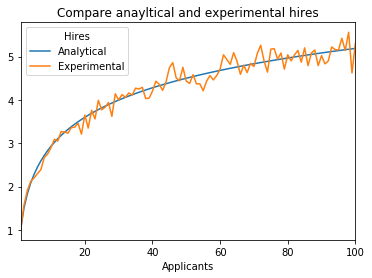

In [6]:
from typing import List
import pandas as pd

min_n: int = 1
max_n: int = 100

Ns: List = list(range(min_n, max_n + 1))  # Stores the number of applicants
analytical: List = []  # Stores the theoretical number of hires
experimental: List = []  # Stores the simulated number of hires

for N in Ns:
    analytical.append(analytical_hires(N))
    experimental.append(experimental_hires(N))

d: dict = {"Analytical": analytical, "Experimental": experimental}
df: pd.DataFrame = pd.DataFrame(data=d, index=Ns)
df.index.name = "Applicants"
df.columns.name = "Hires"

%matplotlib inline
df.plot(title="Compare anayltical and experimental hires")

## Question 4.

Plot a graph with the x-axis showing the total number of applicants and the y-axis showing the probability that exactly one assistant is hired.

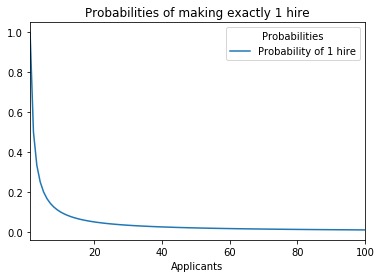

In [7]:
import numpy as np
import pandas as pd

min_n: int = 1
max_n: int = 100

Ns: np.ndarray = np.arange(min_n, max_n+1)  # Stores the number of applicants
probabilities: np.ndarray = 1/Ns

d = {"Probability of 1 hire": probabilities}
df: pd.DataFrame = pd.DataFrame(data=d, index=Ns)
df.index.name = "Applicants"
df.columns.name = "Probabilities"

%matplotlib inline
df.plot(title="Probabilities of making exactly 1 hire")

## [Optional] Question 5.
Assume that an assistant is able to perform an amount of work each day that is equal to their “quality”. You have a total amount of work M that needs to be accomplished. Your costs are as follows:
* X = daily salary for the assistant,
* Y = fee to the employment agency,
* Z = retrenchment fee for the old assistant.

Try to formulate an optimal stopping rule (i.e., at what point should one stop requesting new potential hires from the agency?) Make any necessary assumptions to ensure the problem is well-formulated.


In [8]:
"""
Assumptions:
    x: The salary of an assistant is a constant 1000 units
    y: The fee to the employment agency is 250 units each time you make a hire
    z: The retrenchment fee is a constant 250 units
    M: The amount of work done is equalt to the quality of the hire multiplied by 1000

    The profit being made will be:
    With no new hire:
        M - x
    With a new hire:
        (higher) M - x - y - z

    The stopping condition would be when the probability of finding a better higher with 
    a higher profit generating capacity is much lower than a certain percentage we set. 
    In this case we can set the probability as 5%.
    
    Therefore, if the probability of finding a hire that would generate a higher profit is
    less than 5% we stop asking for new hires. 
"""

'\nAssumptions:\n    x: The salary of an assistant is a constant 1000 units\n    y: The fee to the employment agency is 250 units each time you make a hire\n    z: The retrenchment fee is a constant 250 units\n    M: The amount of work done is equalt to the quality of the hire multiplied by 1000\n\n    The profit being made will be:\n    With no new hire:\n        M - x\n    With a new hire:\n        (higher) M - x - y - z\n\n    The stopping condition would be when the probability of finding a better higher with \n    a higher profit generating capacity is much lower than a certain percentage we set. \n    In this case we can set the probability as 5%.\n    \n    Therefore, if the probability of finding a hire that would generate a higher profit is\n    less than 5% we stop asking for new hires. \n'

## Part B. The Hat Check Problem.

There is a coat check at a party, where an attendant stores everyone’s hat while they attend the party. The attendant receives the N hats from everyone attending (all attendees come with a hat). Unfortunately, the coat check attendant forgets which hat belongs to whom. Rather than admitting a mistake, the attendant simply returns random hats back to the party-goers. 

What is the average number of correct hats returned? Here are some guiding questions to help you to simulate this problem. 

## Question 1. 
Knowing that everyone’s hats are unique and every guest has a hat. Do you need to generate a random sample in a similar way as what you did for the hiring assistant problem? 

**YES**, we do need to generate a random sample in a similar way as we did for the hiring assistant problem. The two problems share a commonality whereby we need to find the average number of _(hires)_ correct hat returns given a certain number of _(applicants)_ guests. However, the difference is that in the hat problem we want to find if the hat matches the index of the guest. While in the hires problem, we just wanted to know if the next person has a higher value than the previous hire.

## Question 2. 
Which of the following commands do you think is the Pythonic way to implement that? 
```
import numpy as np
n = 100 #the number of party attendants `
```
**Command 1. **
```
hat_list = [np.random.integers(0,n) for i in range(n)]`
```
**Command 2.**
```
hat_list = list(range(n)) 
np.random.shuffle(hat_list) 
```
**Command 3.**
```
hat_list = np.random.sample(n)
```

The command that generates hat numbers and mixes them up is _command 2_. 

_Command 1_ causes an _error_ since `numpy.random` doesn't have the attribute `integers`.

While _command 3_ generates random numbers between $0$ and $1$, which is helpful for the hires problem but not for the hat check problem.

## Question 3.
Now write a function `hat_check(N)` that has: 
* Input: N the number of party attendants. 
* Output: the number of hats correctly returned despite the fact that hats are randomly handed back to the guests.

You should use the command you picked for question 2. 

In [9]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

## Question 4.

Plot a curve with the x-axis showing the total number of party attendants and the y-axis showing the average number of hats correctly returned. As always, remember to run several trials. 

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## [Optional] Question 5.
As $N$ tends to infinity, the number of correct hats returned tends towards a well-known statistical distribution. State the distribution with all its parameters. Plot several samples using your code. Does the empirical distribution match your theoretical prediction?

YOUR ANSWER HERE